<a href="https://colab.research.google.com/github/Ailton3112/glp/blob/main/NFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# RevGás - Analisando Emissão de NFe

###Importando bibliotecas

In [ ]:
import pandas as pd
!pip install dash
import dash
import dash_core_components as dcc
#import dash_html_components as html
from dash import html
from dash.dependencies import Input,Output
import plotly.express as px
import matplotlib.pyplot as plt

     |████████████████████████████████| 8.5 MB 6.9 MB/s 
     |████████████████████████████████| 357 kB 43.4 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  after removing the cwd from sys.path.


### Setando google drive pra carregar a base

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Carregando Dataset

In [ ]:
revgas = pd.read_csv('/content/gdrive/MyDrive/REVGAS/dados_nfe.csv')
revgas['data'] = pd.to_datetime(revgas['data'])
revgas = pd.read_csv('/content/gdrive/MyDrive/REVGAS/dados_nfe.csv',parse_dates=["data"])

revgas

,cod_em,num_doc,data,Qtde,Produto
0,21,6332,2016-09-28 09:45:38,2,GLP 13KG
1,21,6333,2016-09-28 10:04:18,20,GLP 13KG
2,21,6334,2016-09-28 10:06:34,30,GLP 13KG
3,21,6335,2016-09-28 10:09:02,7,GLP 13KG
4,21,6336,2016-09-28 10:10:31,10,GLP 13KG
...,...,...,...,...,...
1558121,19,1997669,2022-01-18 09:44:07,1,GLP 5KG
1558122,19,1997670,2022-01-18 09:47:04,1,GLP 5KG
1558123,19,1997671,2022-01-18 09:47:06,1,GLP 5KG
1558124,19,1997672,2022-01-18 09:47:08,1,GLP 5KG


### Informações de linhas e colunas do dataset

In [ ]:
print ('Quantidade de linhas e colunas', revgas.shape)

Quantidade de linhas e colunas (1558126, 5)


### Data inicial

In [ ]:
revgas["data"].min()

Timestamp('2016-09-28 09:45:38')

###Data final 

In [ ]:
revgas["data"].max()

Timestamp('2022-01-18 09:47:11')

###Quantidade total de dias (intervalo - data inicial - data final)

In [ ]:
revgas["data"].max()-revgas["data"].min()

Timedelta('1938 days 00:01:33')

### Informações de dados nulos da base

In [ ]:
print ('Quantidade de dado nulos',revgas.isna().sum().sum())

Quantidade de dado nulos 0


### Tipos de dados

In [ ]:
revgas.dtypes

cod_em              int64
num_doc             int64
data       datetime64[ns]
Qtde                int64
Produto            object
dtype: object

### Decomposição do atributo data

In [ ]:
# Create novas colunas
revgas['dia']    = revgas['data'].dt.day
revgas['mes']    = revgas['data'].dt.month
revgas['ano']    = revgas['data'].dt.year
revgas['hora']   = revgas['data'].dt.hour
revgas['minuto'] = revgas['data'].dt.minute
revgas

,cod_em,num_doc,data,Qtde,Produto,dia,mes,ano,hora,minuto
0,21,6332,2016-09-28 09:45:38,2,GLP 13KG,28,9,2016,9,45
1,21,6333,2016-09-28 10:04:18,20,GLP 13KG,28,9,2016,10,4
2,21,6334,2016-09-28 10:06:34,30,GLP 13KG,28,9,2016,10,6
3,21,6335,2016-09-28 10:09:02,7,GLP 13KG,28,9,2016,10,9
4,21,6336,2016-09-28 10:10:31,10,GLP 13KG,28,9,2016,10,10
...,...,...,...,...,...,...,...,...,...,...
1558121,19,1997669,2022-01-18 09:44:07,1,GLP 5KG,18,1,2022,9,44
1558122,19,1997670,2022-01-18 09:47:04,1,GLP 5KG,18,1,2022,9,47
1558123,19,1997671,2022-01-18 09:47:06,1,GLP 5KG,18,1,2022,9,47
1558124,19,1997672,2022-01-18 09:47:08,1,GLP 5KG,18,1,2022,9,47


## NFE  (por empresa)

### Dados

In [ ]:
revgas_empresa = revgas.groupby([revgas["cod_em"]])["num_doc"].count()
revgas_empresa

cod_em
9      23321
11        32
19      1097
21      7703
22      2653
       ...  
939      327
941        1
942        1
945      516
948       63
Name: num_doc, Length: 392, dtype: int64

### Gráfico

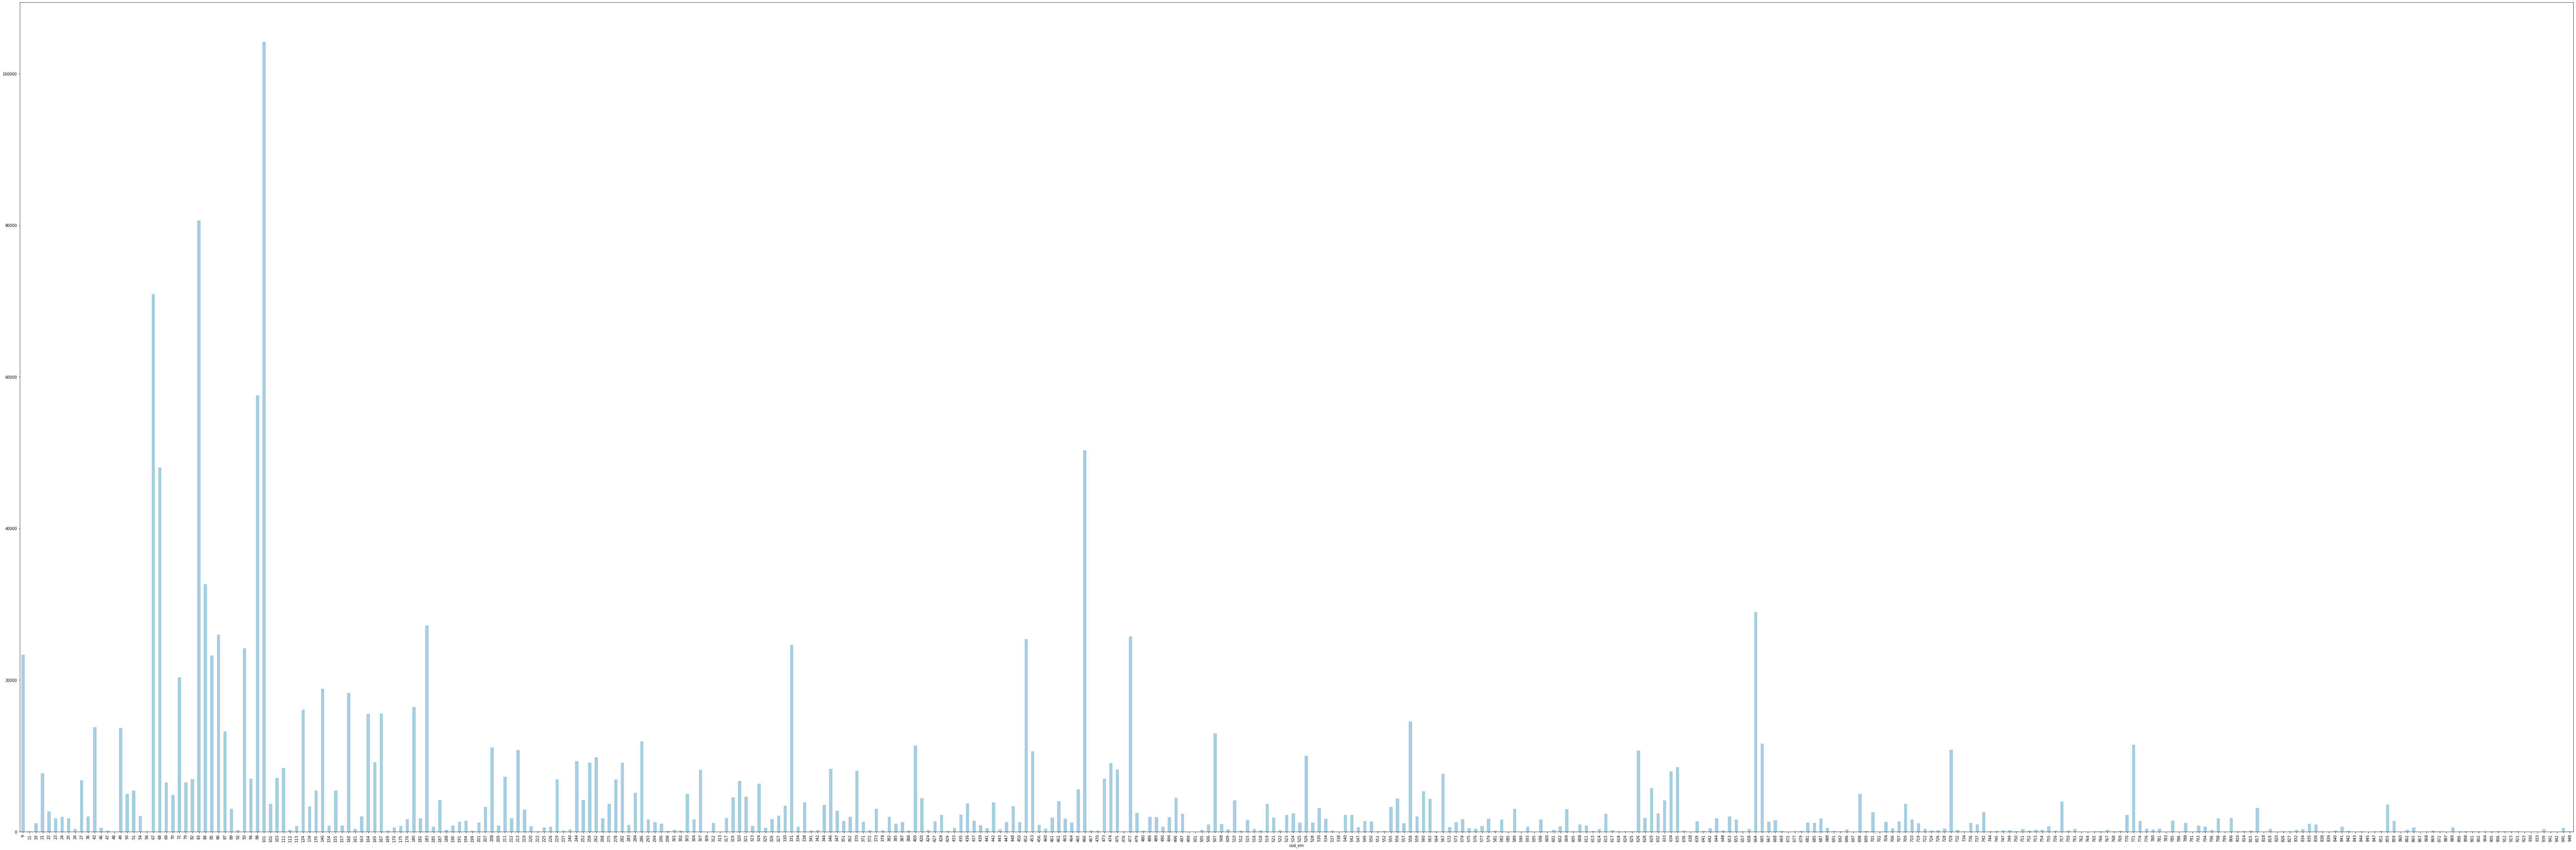

In [ ]:
revgas_empresa = revgas.groupby([revgas["cod_em"]])["num_doc"].count().plot(kind='bar',colormap='Paired',stacked=True,figsize=(120, 40))

## NFE  (dia da semana e empresa)





### Dados

In [ ]:
revgas_Dia_semana_intervalo_data = revgas.groupby([revgas["data"].dt.weekday,"cod_em"])["num_doc"].count()
revgas_Dia_semana_intervalo_data.head()

data  cod_em
0     9         3821
      11           7
      19         142
      21        1484
      22         574
Name: num_doc, dtype: int64

## NFE  (apenas dia da semana)



### Dados

In [ ]:
revgas_Dia_semana_intervalo_data = revgas.groupby([revgas["data"].dt.weekday])["num_doc"].count()
revgas_Dia_semana_intervalo_data 

data
0    262239
1    261365
2    257942
3    262701
4    242433
5    189543
6     81903
Name: num_doc, dtype: int64

### Gráfico

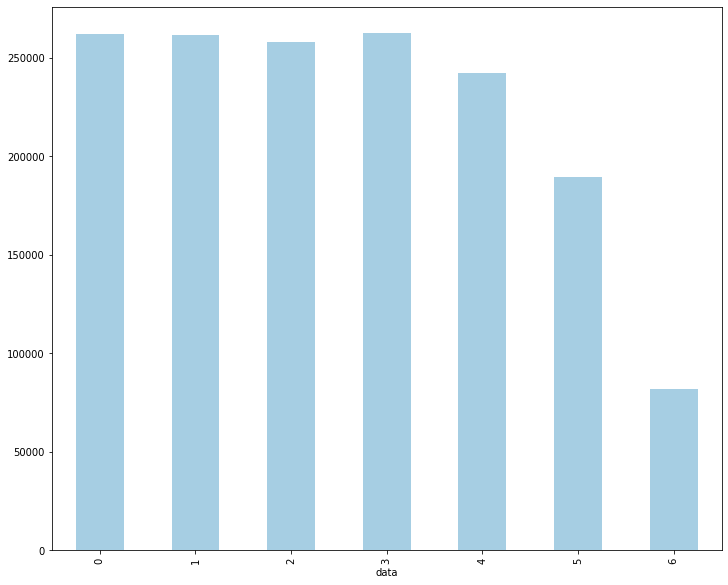

In [ ]:
revgas_Dia_semana_intervalo_data = revgas.groupby([revgas["data"].dt.weekday])["num_doc"].count().plot(kind='bar',colormap='Paired',stacked=True,figsize=(12, 10))


## NFE  (apenas por hora)

### Dados

In [ ]:
### Gerar arquivo e enviaras
#### Hora >>> Colunua >>> graf
revgas_nfe_hora = revgas.groupby([revgas["data"].dt.hour])["num_doc"].count()
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))

revgas_nfe_hora

data
0        640
1         37
2         40
3         30
4         16
5        781
6      48904
7      81654
8      88910
9     117324
10    135259
11    136188
12     92513
13     64259
14     88697
15    120984
16    134144
17    155791
18    123217
19     66686
20     38784
21     29416
22     22470
23     11382
Name: num_doc, dtype: int64

###Gráfico

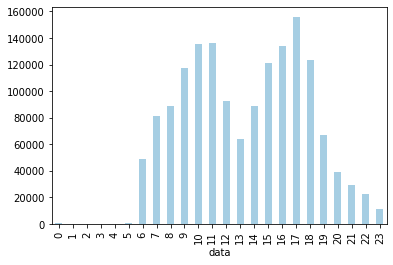

In [ ]:
revgas_nfe_hora = revgas.groupby([revgas["data"].dt.hour])["num_doc"].count().plot(kind='bar',colormap='Paired')

## NFE  (Mês)

### Dados

In [ ]:
revgas_nfe_mes = revgas.groupby([revgas["mes"]])["num_doc"].count()

revgas_nfe_mes


mes
1     129725
2      90280
3     106722
4     112986
5     115294
6     131982
7     141775
8     145625
9     140412
10    140317
11    146145
12    156863
Name: num_doc, dtype: int64

### Gráfico

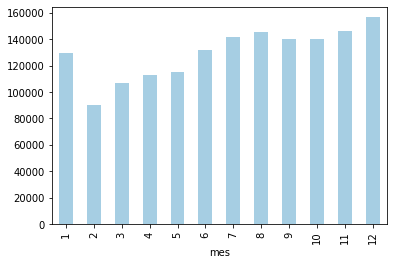

In [ ]:
revgas_nfe_mes = revgas.groupby([revgas["mes"]])["num_doc"].count().plot(kind='bar',colormap='Paired')

##NFE  (Mês, Dia da Semana e empresa) 

###Dados

In [ ]:
revgas_nfe_mes_dia = revgas.groupby([revgas["mes"], revgas["dia"], "cod_em"])["num_doc"].count()
revgas_nfe_mes_dia

mes  dia  cod_em
1    1    24          4
          43          9
          54          1
          67         88
          68         22
                   ... 
12   31   912         3
          913         4
          933         1
          939         2
          945       102
Name: num_doc, Length: 56091, dtype: int64

## NFE  (Mês e Ano)

### Dados

In [ ]:
revgas_NFE_Mes_Ano_intervalo_data = revgas.groupby([revgas["mes"],revgas["ano"]])["num_doc"].count()
revgas_NFE_Mes_Ano_intervalo_data

mes  ano 
1    2017     2770
     2018    13712
     2019    18385
     2020    18810
     2021    39390
             ...  
12   2017     9134
     2018    15656
     2019    17087
     2020    39423
     2021    73098
Name: num_doc, Length: 65, dtype: int64

### Gráfico

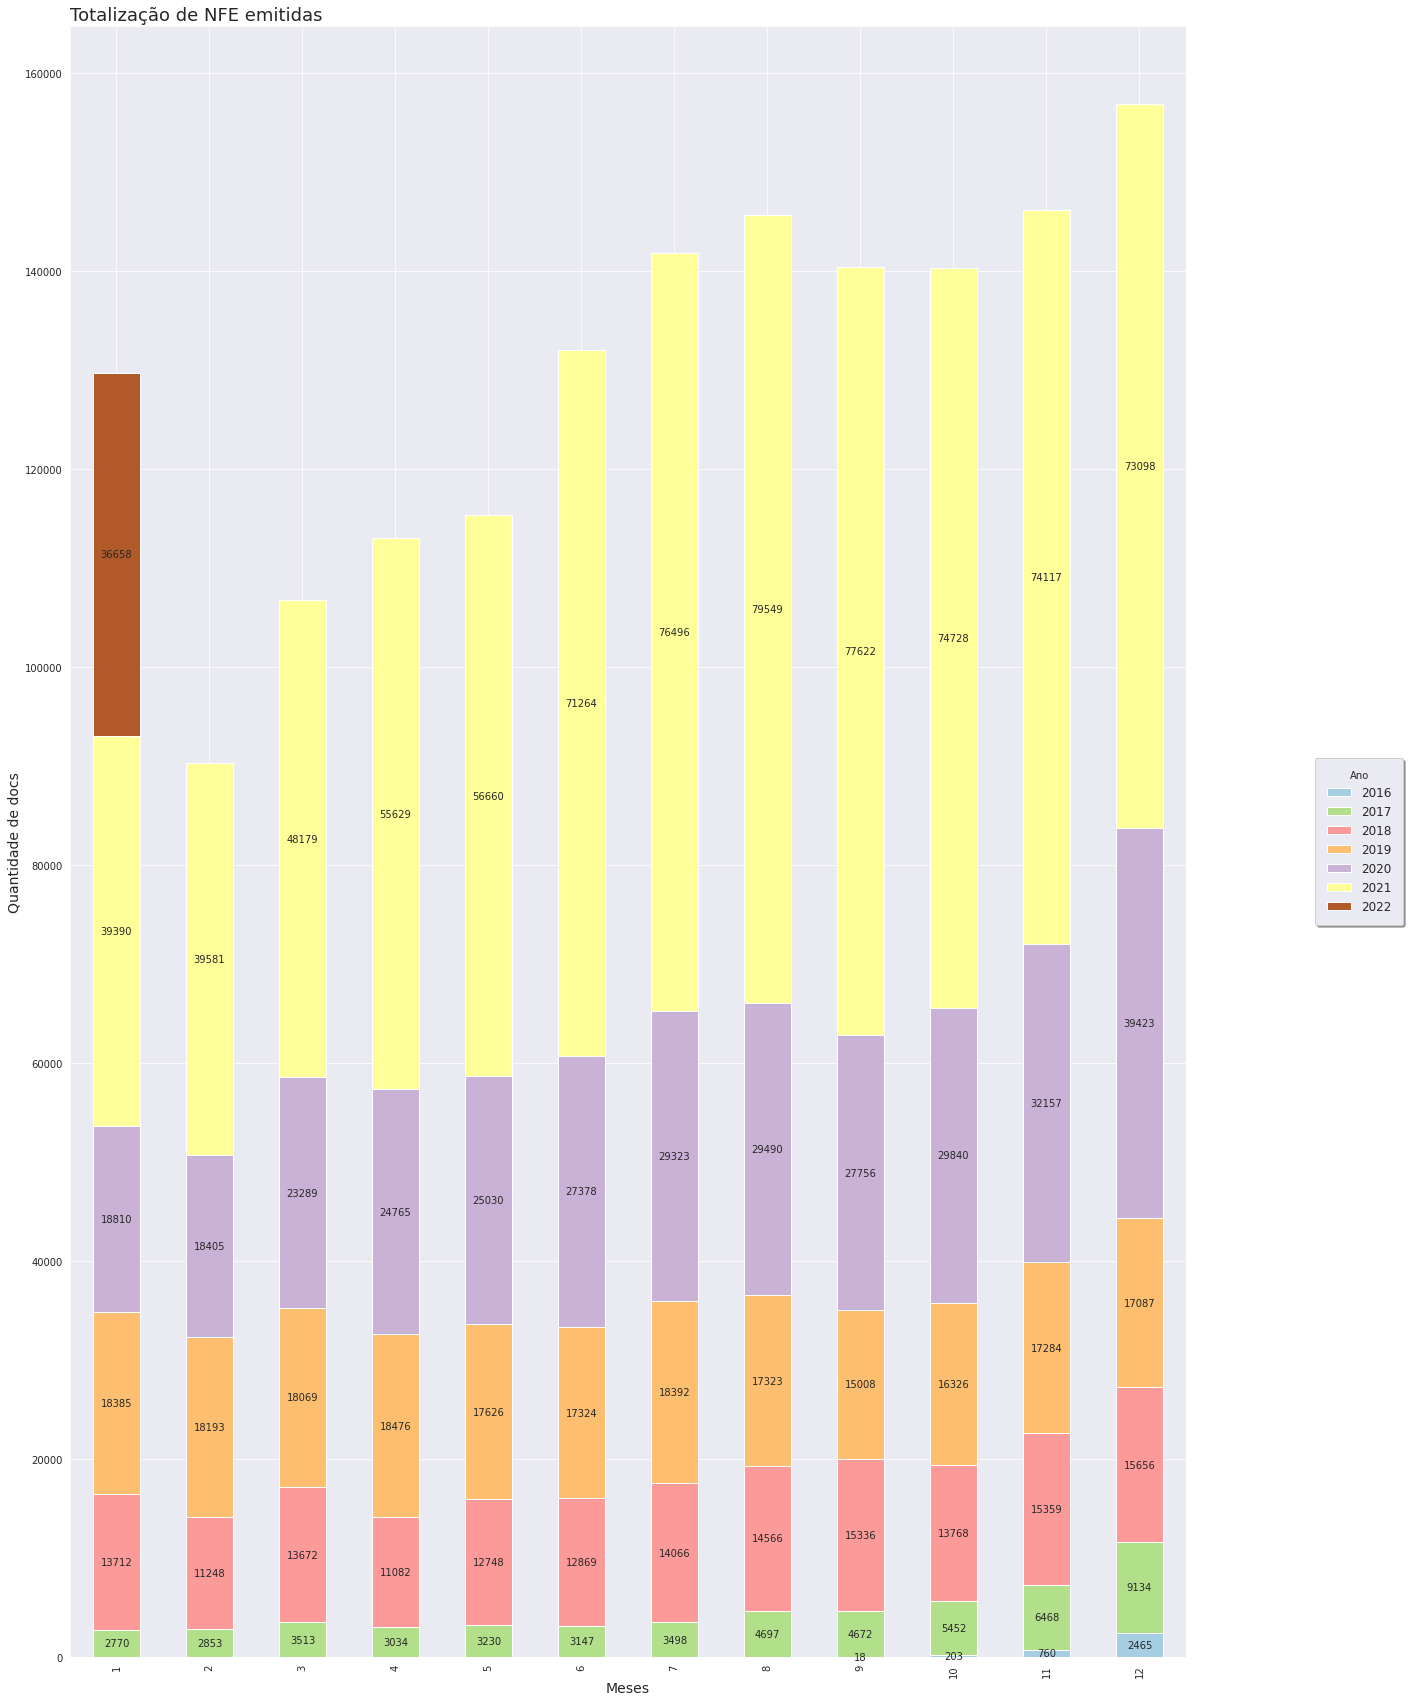

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
#plt.style.use('ggplot')

revgas_Mes_Ano_intervalo_data = revgas.groupby([revgas["mes"],revgas["ano"]])["num_doc"].count().unstack().plot(kind='bar',colormap='Paired',stacked=True,figsize=(20, 30))
#revgas_Mes_Ano_intervalo_data.plot()
#plt.style.use('fivethirtyeight')

plt.xlabel('Meses',fontsize=14)
plt.ylabel('Quantidade de docs',fontsize=14)
plt.title('Totalização de NFE emitidas',fontsize=18, loc='left');
plt.legend(shadow=True, borderpad=1,loc='right', ncol=1, prop={'size':12}, bbox_to_anchor=(1.2, 0.5), title='Ano',fontsize=18)
#plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2))

ax= revgas_Mes_Ano_intervalo_data

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.0f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
    
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
plt.show()


## NFE (Ano, mês, dia e empresa)

### Dados

In [ ]:
revgas_Ano_Mes_Dia_intervalo_data = revgas.groupby([revgas["ano"], revgas["mes"],revgas["dia"],"cod_em"])["num_doc"].count()
revgas_Ano_Mes_Dia_intervalo_data.head(40)

ano   mes  dia  cod_em
2016  9    28   21        17
           29   21         1
      10   3    21         1
                22         5
           4    21         5
                22         5
                23         3
                24         1
           5    23         3
                24         4
           6    22         2
                23         3
                24         1
           7    23         3
                24         1
           8    22         7
                24         1
           9    23         4
           10   24         1
           11   22         4
                24         1
           12   24         2
           13   24         1
                25        13
           14   24         1
           17   22         5
                23         2
           18   22         5
                23         2
           19   23         8
                24         1
           20   22         8
                25         4
                54  

## NFE por produto

In [ ]:
revgas_NFE_prod = revgas.groupby([revgas["Produto"]])["num_doc"].count().sort_values(ascending=False)
#revgas_NFE_prod.head(20)
# Salva resultados para arquivo .csv
revgas_NFE_prod.to_csv("/content/gdrive/MyDrive/REVGAS/output/produtos_mais_vendidos.csv")

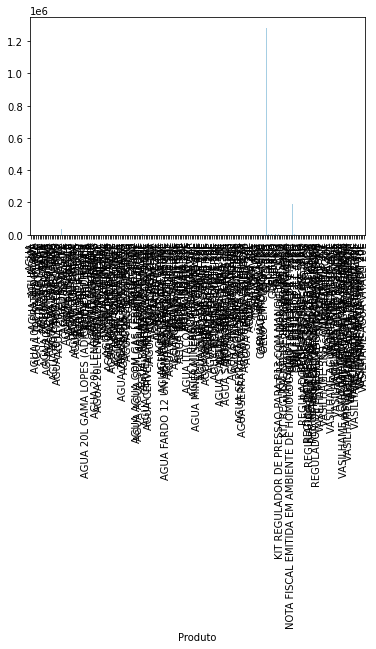

In [ ]:
revgas_NFE_prod = revgas.groupby([revgas["Produto"]])["num_doc"].count().plot(kind='bar',colormap='Paired',stacked=True)


## Salva resultados para arquivo .csv .pkl

In [ ]:
# Salva resultados para arquivo .csv
revgas_Ano_Mes_Dia_intervalo_data.to_csv("/content/gdrive/MyDrive/REVGAS/revgas_ano_mes_dia.csv")

# Salva resultados para arquivo .pkl
#revgas_panorama_cliente.to_pickle("/content/gdrive/MyDrive/REVGAS/revgas_ano_mes_dia.pkl")

# Ler arquivo .pkl
#df2 = pd.read_pickle('/content/gdrive/MyDrive/REVGAS/revgas.pkl')

NameError: ignored

# NFe Pagamentos

In [ ]:
revgas_pag = pd.read_csv('/content/gdrive/MyDrive/REVGAS/dados_nfce_pagamento.csv')
revgas_pag['data'] = pd.to_datetime(revgas['data'])
revgas_pag = pd.read_csv('/content/gdrive/MyDrive/REVGAS/dados_nfce_pagamento.csv',parse_dates=["data"])
revgas_pag

,id_revenda,id_nfce,id_venda,data,quantidade,produtos,pagamentos,valores,total
0,21,736123,1326259,2020-05-19 22:01:50,1,ONU 1075 GLP 2.1 - 13KG,Dinheiro,75.00,75.0
1,208,739769,1332480,2020-05-23 14:46:46,1,ONU 1075 GLP 2.1 - 13KG,Dinheiro,60.00,60.0
2,208,739768,1332498,2020-05-23 14:42:57,1,ONU 1075 GLP 2.1 - 13KG,Cartão de Crédito,65.00,65.0
3,208,740369,1333379,2020-05-24 11:17:44,1,ONU 1075 GLP 2.1 - 13KG,Dinheiro,60.00,60.0
4,286,751339,1346943,2020-06-01 15:27:36,1,ONU 1075 GLP 2.1 - 13KG,Cartão de Crédito,65.00,65.0
...,...,...,...,...,...,...,...,...,...
135694,710,1997534,3809854,2022-01-17 20:43:25,1,ONU 1075 GLP 2.1 - 13KG,Cartão de Débito,105.00,105.0
135695,604,1997553,3809900,2022-01-17 20:58:57,1,ONU 1075 GLP 2.1 - 13KG,Cartão de Crédito,101.00,101.0
135696,736,1997650,3809963,2022-01-17 22:16:54,1,ONU 1075 GLP 2.1 - 13KG,PIX,130.00,130.0
135697,736,1997649,3809968,2022-01-17 22:16:49,1,ONU 1075 GLP 2.1 - 13KG,Cartão de Débito,132.00,132.0


In [ ]:
#revgas_a['data'] = pd.to_datetime(revgas_a['data'])
# Create novas colunas
revgas_pag['dia']    = revgas_pag['data'].dt.day
revgas_pag['mes']    = revgas_pag['data'].dt.month
revgas_pag['ano']    = revgas_pag['data'].dt.year
revgas_pag['hora']   = revgas_pag['data'].dt.hour
revgas_pag['minuto'] = revgas_pag['data'].dt.minute


###Data Inicial

In [ ]:
revgas_pag["data"].min()

Timestamp('2020-05-19 22:01:50')

### Data Final

In [ ]:
revgas_pag["data"].max()

Timestamp('2022-01-17 22:20:05')

## Produtos

###Por Revenda

In [ ]:
revgas_prod_rev = revgas_pag.groupby([revgas_pag["id_revenda"],revgas_pag["produtos"]])["quantidade"].count()
revgas_prod_rev.head(60)


id_revenda  produtos                                                    
19          ONU 1075 GLP 2.1 - 20KG                                            1
21          ONU 1075 GLP 2.1 - 13KG                                            2
24          ONU 1075 GLP 2.1 - 13KG                                            1
25          ONU 1075 GLP 2.1 - 13KG                                            1
26          ONU 1075 GLP 2.1 - 13KG                                            1
27          AGUA 20L                                                           8
            AGUA 20L - ONU 1075 GLP 2.1 - 13KG                                 2
            ONU 1075 GLP 2.1 - 13KG                                          118
            ONU 1075 GLP 2.1 - 45KG                                            1
36          AGUA 20L                                                           1
            AGUA 20L INDAIÀ                                                    2
            AGUA SANTA 20L          

### Por Nota

In [ ]:
#revgas_notas_prod = revgas_pag.groupby([revgas_pag["produtos"]])["id_nfce"].sum()

revgas_notas_prod = revgas_pag.groupby([revgas_pag["produtos"],revgas_pag["id_nfce"]])["quantidade"].count()

revgas_notas_prod.head(30)

produtos                             id_nfce
AGUA                                 1376028    1
                                     1395723    1
                                     1418516    1
                                     1432656    1
                                     1435348    1
                                     1701957    1
                                     1828868    1
                                     1856851    1
                                     1902551    1
AGUA  20L                            883594     1
                                     1120756    1
                                     1134288    1
                                     1228655    1
                                     1346310    1
                                     1461835    1
                                     1461882    1
                                     1671231    1
                                     1671273    1
                                     1853985    1
     

In [ ]:
revgas_id_venda = revgas_pag.groupby([revgas_pag["produtos"],revgas_pag["id_venda"],revgas_pag["quantidade"]])["quantidade"].count().sort_values(ascending=False)
revgas_id_venda.to_csv("/content/gdrive/MyDrive/REVGAS/output/quantidade_produtos_id_venda.csv")

revgas_id_venda.head(40)


produtos                 id_venda  quantidade
AGUA                     2590500   2             1
ONU 1075 GLP 2.1 - 13KG  2980789   1             1
                         2981005   1             1
                         2980999   1             1
                         2980991   1             1
                         2980988   1             1
                         2980986   1             1
                         2980984   2             1
                         2980980   1             1
                         2980977   2             1
                         2980968   3             1
                         2980914   1             1
                         2980906   1             1
                         2980817   1             1
                         2980810   3             1
                         2980804   1             1
                         2980774   1             1
                         2981646   1             1
                         2980772   1

## Quantitativo de Notas emitidas

### Ano, Mês e Dia

In [ ]:
revgas_notas_dia = revgas_pag.groupby([revgas_pag["ano"],revgas_pag["mes"],revgas_pag["dia"]])["id_nfce"].count()
revgas_notas_dia.head(30)


ano   mes  dia
2020  5    19      1
           23      2
           24      1
      6    1       1
      7    28      1
           29      2
           30      1
      8    10      1
           17      1
           18     41
           20      7
           27      1
           31      1
      9    6      57
           7       1
           11     34
           12     12
           13     15
           14     23
           15     20
           16     17
           18     17
           19     32
           21      5
           22     39
           23     28
           24      1
           25      1
           26      1
           29     48
Name: id_nfce, dtype: int64

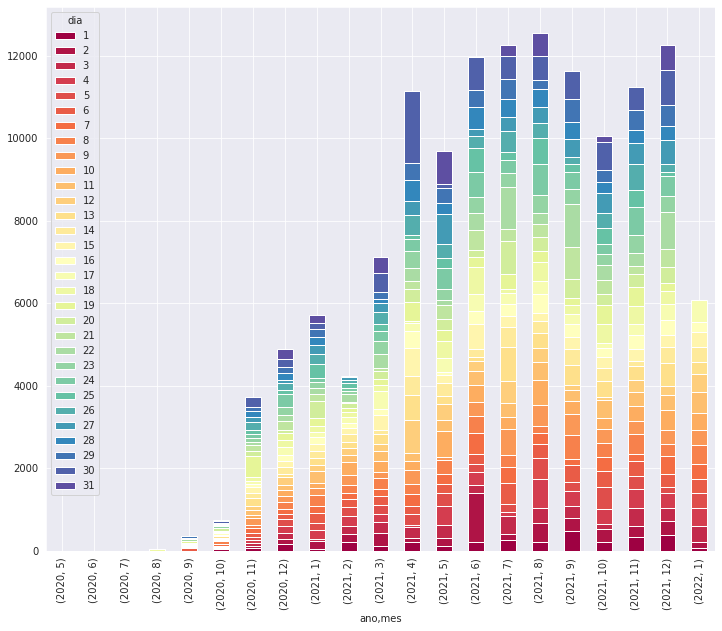

In [ ]:
revgas_notas_dia = revgas_pag.groupby([revgas_pag["ano"],revgas_pag["mes"],revgas_pag["dia"]])["id_nfce"].count().unstack().plot(kind='bar',colormap='Spectral',stacked=True,figsize=(12, 10))

#revgas_Mes_Ano_intervalo_data.plot()

###Ano

In [ ]:
revgas_notas_ano = revgas_pag.groupby([revgas_pag["ano"]])["id_nfce"].count()
revgas_notas_ano.head(30)


ano
2020      9788
2021    119834
2022      6077
Name: id_nfce, dtype: int64

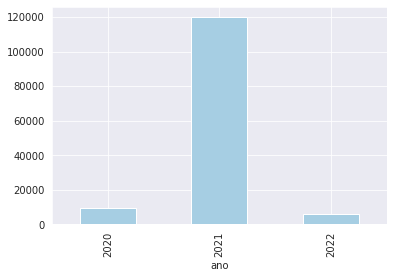

In [ ]:
revgas_notas_ano = revgas_pag.groupby([revgas_pag["ano"]])["id_nfce"].count().plot(kind='bar',colormap='Paired',stacked=True)


### Mês

In [ ]:
revgas_notas_mes = revgas_pag.groupby([revgas_pag["mes"]])["id_nfce"].count()
revgas_notas_mes.head(30)

mes
1     11778
2      4228
3      7121
4     11137
5      9696
6     11966
7     12266
8     12599
9     11983
10    10808
11    14957
12    17160
Name: id_nfce, dtype: int64

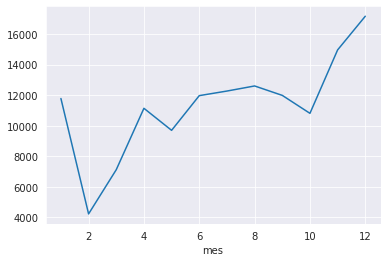

In [ ]:
revgas_notas_mes = revgas_pag.groupby([revgas_pag["mes"]])["id_nfce"].count().plot()


### Dia

In [ ]:
revgas_notas_dia = revgas_pag.groupby([revgas_pag["dia"]])["id_nfce"].count()
revgas_notas_dia.head(100)

dia
1     3058
2     4450
3     3841
4     4471
5     3957
6     4238
7     3961
8     4602
9     4706
10    4917
11    4476
12    4194
13    5075
14    4126
15    4442
16    3697
17    4107
18    3860
19    4039
20    4361
21    3973
22    5696
23    4157
24    5143
25    3688
26    4334
27    4692
28    4139
29    4420
30    7639
31    3240
Name: id_nfce, dtype: int64

## Formas de Pagamento

### Sintético

In [ ]:
revgas_forma_pag = revgas_pag.groupby([revgas_pag["pagamentos"]])["quantidade"].count().sort_values(ascending=False)

revgas_forma_pag.to_csv("/content/gdrive/MyDrive/REVGAS/output/formas_pagamento.csv")

revgas_forma_pag.head(200)


pagamentos
Dinheiro                                                 92561
Cartão de Crédito                                        14925
Cartão de Débito                                         12414
PIX                                                       4281
Carteira                                                  3012
Vale Gás                                                  2506
Transferência Bancária                                    1765
Dinheiro - Cartão de Débito                               1005
Cartão Credishop                                           812
Dinheiro - Cartão de Crédito                               730
Crédito de Cliente                                         316
Cartão Outro                                               289
Dinheiro - PIX                                             266
Cartão de Crédito - Cartão de Débito                       155
Boleto Bancário                                            149
Dinheiro - Transferência Bancária           

### Revenda

In [ ]:
revgas_forma_pag_rev = revgas_pag.groupby([revgas_pag["id_revenda"],revgas_pag["pagamentos"]])["quantidade"].count()
#sort_values(ascending=False
revgas_forma_pag_rev.head(40)


id_revenda  pagamentos                             
19          Dinheiro                                     1
21          Dinheiro                                     2
24          Dinheiro                                     1
25          Dinheiro                                     1
26          Carteira                                     1
27          Carteira                                    40
            Cartão de Crédito                           11
            Cartão de Crédito - Cartão de Débito         1
            Cartão de Débito                            19
            Dinheiro                                    55
            Dinheiro - Carteira                          3
36          Dinheiro                                     4
43          Dinheiro                                     2
49          Cartão Master                                1
            Dinheiro                                     2
93          Dinheiro                                     1
98  

# NFe Emitidas

### Carrega dataset

In [ ]:
revgas_itens_nfe = pd.read_csv('/content/gdrive/MyDrive/REVGAS/produtos_nfce_2.csv')
revgas_itens_nfe['date'] = pd.to_datetime(revgas_itens_nfe['date'])
revgas_itens_nfe = pd.read_csv('/content/gdrive/MyDrive/REVGAS/produtos_nfce_2.csv',parse_dates=["date"])
revgas_itens_nfe

,id_nfce,date,product,quantity_product,unitvalue_product,unitdiscount_product,total
0,6329,2016-09-28 09:12:59,GLP 13KG,1,60.0,0.0,60.0
1,6330,2016-09-28 09:13:29,GLP 13KG,1,60.0,0.0,60.0
2,6331,2016-09-28 09:24:26,GLP 13KG,1,60.0,0.0,60.0
3,6332,2016-09-28 09:45:38,GLP 13KG,2,60.0,0.0,120.0
4,6333,2016-09-28 10:04:18,GLP 13KG,20,50.0,0.0,1000.0
...,...,...,...,...,...,...,...
1563796,1997657,2022-01-17 22:17:25,AGUA MINERAL PURISSIMA 20L,1,15.0,0.0,15.0
1563797,1997658,2022-01-17 22:17:29,AGUA MINERAL PURISSIMA 20L,1,15.0,0.0,15.0
1563798,1997659,2022-01-17 22:17:34,AGUA MINERAL PURISSIMA 20L,1,15.0,0.0,15.0
1563799,1997660,2022-01-17 22:18:44,ONU 1075 GLP 2.1 - 13KG,1,110.0,5.0,105.0


### Agrupamento por id da nota e produtos da nota

In [ ]:
revgas_itens_nfce_itens = revgas_itens_nfe.groupby([revgas_itens_nfe["id_nfce"],revgas_itens_nfe["product"]])["id_nfce"].count()
revgas_itens_nfce_itens


id_nfce  product                   
6329     GLP 13KG                      1
6330     GLP 13KG                      1
6331     GLP 13KG                      1
6332     GLP 13KG                      1
6333     GLP 13KG                      1
                                      ..
1997657  AGUA MINERAL PURISSIMA 20L    1
1997658  AGUA MINERAL PURISSIMA 20L    1
1997659  AGUA MINERAL PURISSIMA 20L    1
1997660  ONU 1075 GLP 2.1 - 13KG       1
1997661  ONU 1075 GLP 2.1 - 13KG       1
Name: id_nfce, Length: 1557016, dtype: int64

In [ ]:
teste1 = revgas_itens_nfce_itens.groupby("id_nfce").size().reset_index(name='QtdeProdutos')
teste1

,id_nfce,QtdeProdutos
0,6329,1
1,6330,1
2,6331,1
3,6332,1
4,6333,1
...,...,...
1552324,1997657,1
1552325,1997658,1
1552326,1997659,1
1552327,1997660,1


### Quantitativo de notas (NFe) por itens(produtos) 


In [ ]:
teste2 = teste1.groupby([teste1["QtdeProdutos"]]).size().reset_index(name='Quantidade_Notas')
teste2.to_csv("/content/gdrive/MyDrive/REVGAS/output/quantidade_notas_por_quantidade_produtos.csv")
teste2

,QtdeProdutos,Quantidade_Notas
0,1,1548207
1,2,3684
2,3,311
3,4,127
